In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
train_directory = "D:\Eye_dataset\Eye dataset"
size=94
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    validation_split = 0.1,
).flow_from_directory(train_directory, batch_size = 16, target_size =
                      (size, size), subset = "training", shuffle = True)

Found 12927 images belonging to 4 classes.


In [3]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_directory,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)

Found 1433 images belonging to 4 classes.


In [4]:


test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1  
).flow_from_directory(train_directory,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)



Found 1433 images belonging to 4 classes.


In [5]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint


In [6]:


optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)



In [7]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [8]:
model=Sequential([
                  Conv2D(32,3,activation='relu',kernel_initializer='he_normal',input_shape=(size,size,3)),
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(256,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Flatten(),
                  Dense(64,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  Dense(4,activation='softmax',kernel_initializer='glorot_normal')
                  
])
          

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 128)      5

In [10]:


model.compile(optimizer=optimizer_adam,
              loss='categorical_crossentropy',metrics=['accuracy'])



In [11]:
history = model.fit(x = train_generator,
                    validation_data = valid_generator,
                    epochs = 5)


Epoch 1/5
808/808 [==============================] - 314s 388ms/step - loss: 0.2836 - accuracy: 0.9019 - val_loss: 0.7047 - val_accuracy: 0.7334
Epoch 2/5
808/808 [==============================] - 242s 299ms/step - loss: 0.1359 - accuracy: 0.9575 - val_loss: 1.4722 - val_accuracy: 0.6288
Epoch 3/5
808/808 [==============================] - 247s 306ms/step - loss: 0.1090 - accuracy: 0.9655 - val_loss: 0.1923 - val_accuracy: 0.9665
Epoch 4/5
808/808 [==============================] - 250s 310ms/step - loss: 0.0901 - accuracy: 0.9711 - val_loss: 0.1168 - val_accuracy: 0.9637
Epoch 5/5
808/808 [==============================] - 251s 311ms/step - loss: 0.0758 - accuracy: 0.9776 - val_loss: 0.2802 - val_accuracy: 0.9309


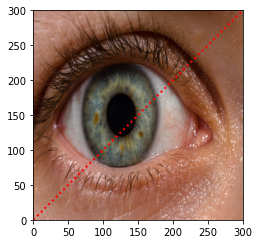

In [20]:
#SHowing randomly downloaded eye - image from internet
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("C:\\Users\\vijay\\Downloads\\Human_eye_with_blood_vessels.jpg") #eye
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
x = np.array(range(300))
ax.plot(x, x, ls='dotted', linewidth=2, color='red')
plt.show()

In [21]:
#Now, testing the eye image
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("C:\\Users\\vijay\\Downloads\\Human_eye_with_blood_vessels.jpg", target_size = (size, size))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'Eye found!!'
else:
  prediction = 'found'

In [16]:
print(prediction)

Eye found!!


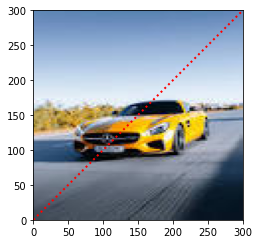

In [17]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("C:\\Users\\vijay\\Downloads\\car_image.jpg") #car
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 300, 0, 300])
x = np.array(range(300))
ax.plot(x, x, ls='dotted', linewidth=2, color='red')
plt.show()

In [18]:
#now, testing with car image
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("C:\\Users\\vijay\\Downloads\\car_image.jpg", target_size = (size, size))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'Eye found!!'
else:
  prediction = 'No eyes are found'

In [19]:
print(prediction)

No eyes are found
